# **Netflix Movies and TV Shows | EDA**
---

## 1.   Descripción general del conjunto de datos
Este conjunto de datos consta de programas de televisión y películas disponibles en Netflix a partir de 2008 y hasta 2020. El conjunto de datos se recopila de Flixable, que es un motor de búsqueda de Netflix de terceros.

## 2.   Descripción de los atributos
* **show_id**: Identificador único para cada película o programa de televisión.
* **type**: Indica si la observación es una película o un programa de televisión.
* **title**: Nombre de la película o programa de televisión.
* **director**: Nombre del director.
* **cast**: Nombre de los actores.
* **country**: País(es) en el que se filmó.
* **data_added**: Fecha en la que se lanzó en Netflix.
* **release_year**: Año de lanzamiento general.
* **rating**: Indica para qué tipo de audiencia es apto el contenido.
* **duration**: Duración de la película (minutos) o del programa de televisión (cantidad de temporadas).
* **listed_in**: Géneros.
* **description**: Descripción consisa de la trama.

## 3.   Planteamiento de preguntas
A partir del análisis exploratorio del conjunto de datos y la creación de visualizaciones se pretende dar indicios sobre las siguientes preguntas:

*  ¿En qué tipo de contenido se ha enfocado Netflix en los últimos años, en películas o en series?
*  ¿Cuál es el público meta de Netflix, para qué tipo de audiencia hay más variedad de contenido?
*  ¿De cuáles géneros hay mayor cantidad de contenido? Tanto en películas como en programas de televisión.



# **Conjunto de datos**


---

En esta sección se carga el conjunto de datos desde Google Drive y se hacen algunas observaciones sobre la limpieza previa hecha en Open Refine.



In [1]:
from pandas import read_csv

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Aquí sería necesario subir el conjunto de datos original a su cuenta de Drive y modificar este path.
path = "/content/gdrive/MyDrive/AVGD/netflix_titles.csv"
df_original = read_csv(path)

In [4]:
df_original.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Valores faltantes
Al inspeccionar el conjunto de datos original, se observa que los atributos ***director*** y ***cast*** tienen las mayor cantidad de valores nulos y, al no ser de interés para las preguntas planteadas, se eliminaron durante la limpieza en *Open Refine*.

Por otro lado, para los atributos ***country***, ***date-added*** y rating se decidió lo siguiente:
*   ***country***: Se tomó el valor más común, que era *United States*, para rellenar los valores faltantes.
*   ***date-added*** y ***rating***: Al ser pocas observaciones se removieron.  

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


## Valores redundates
Se observa que la cantidad de valores únicos para los atributos ***show_id*** y ***title*** concuerdan con la cantidad total de observaciones. Esto se debe a que identifican en forma única cada película/programa de televisión, por lo que son redudantes.  

In [6]:
df_original.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Tratamiento de atributos
Durante la limpieza del conjunto de datos se decidió hacer las siguientes modificaciones a los atributos de interés:

* ***date_added***: Es una hilera que contiene el mes, día y año de lanzamiento del programa de televisión o película, sin embargo, dado que para la pregunta planteada solo interesa el año, solo se conservó esta parte.

* ***listed_in***: Es una hilera separada por comas indicando cada uno de los géneros del programa de televisión o película, sin embargo, esto generaba que cada posible permutación de los géneros se contabilizara como un valor único, no se sabía realmente cuáles eran los géneros individualmente. Para solucionar esto, se decidió tomar solo el género principal (el primero).

* **rating**: Debido a que los nombres de cada tipo de clasificación de audiencia son poco intuitivos, fueron reagrupados en las categorías "Kids", "Older Kids", "Teens" y "Adults".

* ***country***: Es una hilera separada por comas indicando cada uno de los países donde se filmó el programa de televisión o película, sin embargo, igual que el de ***listed_in***, se decidió tomar el principal.


## Conjunto de datos limpio
A partir de ahora se utiliza el conjunto de datos limpio para brindar indicios sobre las preguntas planteadas.

In [7]:
# Aquí sería necesario subir el conjunto de datos limpio a su cuenta de Drive y modificar este path.
path = "/content/gdrive/MyDrive/AVGD/netflix_titles_clean.csv"
df = read_csv(path)
df = df.rename(columns={"date_added":"netflix_release_year"})

In [8]:
df.head()

,show_id,type,title,country,netflix_release_year,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,2020,2020,Adults,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,2016,2016,Adults,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,2018,2011,Adults,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,2017,2009,Teens,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,2020,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   show_id               7770 non-null   object
 1   type                  7770 non-null   object
 2   title                 7770 non-null   object
 3   country               7770 non-null   object
 4   netflix_release_year  7770 non-null   int64 
 5   release_year          7770 non-null   int64 
 6   rating                7770 non-null   object
 7   duration              7770 non-null   object
 8   listed_in             7770 non-null   object
 9   description           7770 non-null   object
dtypes: int64(2), object(8)
memory usage: 607.2+ KB


# **Solución de preguntas**

---
*  ¿En qué tipo de contenido se ha enfocado Netflix en los últimos años, en películas o en series?
*  ¿Cuál es el público meta de Netflix, para qué tipo de audiencia hay más variedad de contenido?
*  ¿De cuáles géneros hay mayor cantidad de contenido? Tanto en películas como en programas de televisión.

## **¿En qué tipo de contenido se ha enfocado Netflix en los últimos años, en películas o en series?**

En esta sección se genéro un gráfico con el objetivo de contrastar la cantidad de películas y programas de televisión lanzados en Netlix en años recientes, desde 2008 hasta 2020. A partir de este se puede observar que entre los años 2008 y 2015 la cantidad de contenido lanzado de cada tipo era muy similar, sin embargo, a partir del 2016 la cantidad de películas aumenta y supera a los programas de televisión. Además, se alcanza un punto máximo en el año 2019, en el que se agregaron 1497 películas, mientras que se agregaron 656 programas de televisión.

In [10]:
import plotly.graph_objects as go

In [11]:
# Se obtiene los registros de películas y series, respectivamente.
movies = df[df["type"] == "Movie"]
tv_shows = df[df["type"] == "TV Show"]

# Se obtiene el número de películas y series lanzadas por cada año.
movies_peer_year = movies['netflix_release_year'].value_counts().reset_index().rename(columns = {'index': 'year', 'netflix_release_year': 'count'}).sort_values('year')
shows_peer_year = tv_shows['netflix_release_year'].value_counts().reset_index().rename(columns = {'index': 'year', 'netflix_release_year': 'count'}).sort_values('year')

# Se genera el gráfico.
movies_plot = go.Scatter( x = movies_peer_year['year'], y = movies_peer_year["count"], name = "Movies", marker = dict(color = "royalblue") )
shows_plot = go.Scatter( x = shows_peer_year['year'], y = shows_peer_year["count"], name = "TV Shows", marker = dict(color = "red") )
plots = [movies_plot, shows_plot]
layout = go.Layout(title="Amount of content released over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(plots, layout=layout)
fig.show()

## **¿Cuál es el público meta de Netflix, para qué tipo de audiencia hay más variedad de contenido?**
---
En esta sección se creo un gráfico de barras, con el objetivo de observar la cantidad de contenido disponible para cada tipo de audiencia, ya sean películas o programas de televisión. A partir de este se observa que la mayoría de contenido de Netflix está orientado hacia la población adulta y joven.


In [12]:
import plotly.express as px

In [13]:
rating_df = df.groupby(['rating']).agg({'show_id': 'count'}).reset_index()
rating_df.columns = ['rating', 'counts']
fig = px.bar(rating_df, x = 'rating', y = 'counts', color = 'rating', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'Count', 'rating':'Target age' })
fig.show()

## **¿De cuáles géneros hay mayor cantidad de contenido? Tanto en películas como en programas de televisión.**
---
En esta sección se utilizó un word cloud para visualizar de cuáles géneros hay mayor cantidad de contenido en Netflix, tanto en películas como en programas de televisión. Se observa que dentro de los programas de televisión hay mayor variedad dentro de las categorías TV Shows, Internacional Shows y Crime TV, mientras que en las películas hay más variedad en los géneros Action Adventure, Family Movies, Children Family y Dramas.

Nota: Se eligió este tipo de visualización debido a que, por la cantidad de géneros, los gráficos tradicionales se saturaban demasiado de columnas o de líneas. Nótese que esta visualización permuta algunas palabras, por ejemplo, "TV Internacional" sale repetido como "Internacional TV" cuando, como tal, en el conjunto de datos solo existe "TV International". No encontré cómo deshabilitar dicho comportamiento.

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

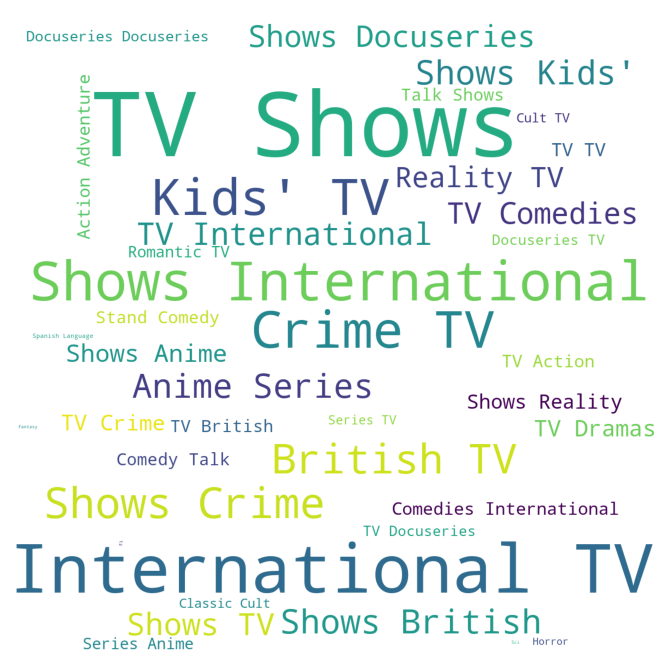

In [15]:
text = ' '.join(tv_shows['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

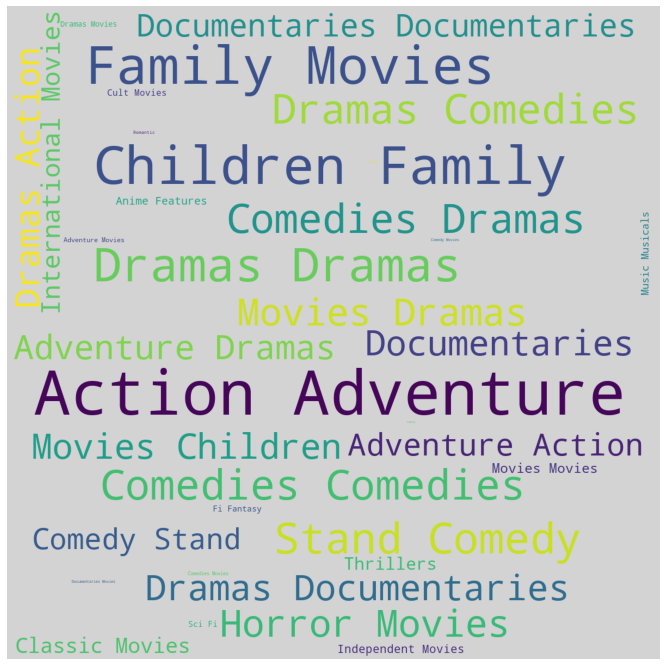

In [16]:
genres = ' '.join(movies['listed_in'])
plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'lightgrey', width = 1200,  height = 1200, max_words = 120).generate(genres)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()